Urban Data Science & Smart Cities <br>
URSP688Y <br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

[<img src="https://colab.research.google.com/assets/colab-badge.svg">](https://colab.research.google.com/github/ncsg/ursp688y_sp2024/blob/main/exercises/exercise07/exercise07.ipynb)

# Exercise 7

## Problem

In week 7, you learned how to extend tabular data with geospatial information: points, linestrings, and polygons.

For this next exercise, please ask a planning-related question with a spatial component, then find data and apply any data science methods you have learned so-far (or can Google!) to answer that question.

## Data

You are welcome to use any data you would like, including data used in previous demos and exercises.

## A Few Pointers
- Choose a straightforward question that requires a reasonable amount of data! Don't shoot for the moon. This exercise is intended to give you a chance to practice finding and analyzing spatial data, not to address the world's greatest challenges.
- Consider using this exercise to get a head start on your final project or explore options for it. Your project doesn't need to focus on spatial analysis for it to play a role. Are there datasets you might join together based on spatial locations?
- Don't go overboard. If you're hitting a wall with coding, write pseudocode and turn that in. Don't let the perfect be the enemy of the done. But if you're energized and having fun by chasing down a thorny solution to a coding problem, by all means feel free to keep at it!



In [ ]:
#The following is similar work that I want to do in my Final Project
#I just completed the first step to use and visualize the nearest stop from the Hospital around DC

#The following are thw question whose answer I want to find out
#1. Find the nearest transit stop to each hospital
#2. Visualize the hospitals, transit stops, and the nearest transit stop for each hospital on a map

In [ ]:
import os
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set the working directory
# You will need to change this to your own folder on Google Drive
os.chdir('/content/drive/MyDrive/Spring_24_UMD_Courses/URSP 688Y')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


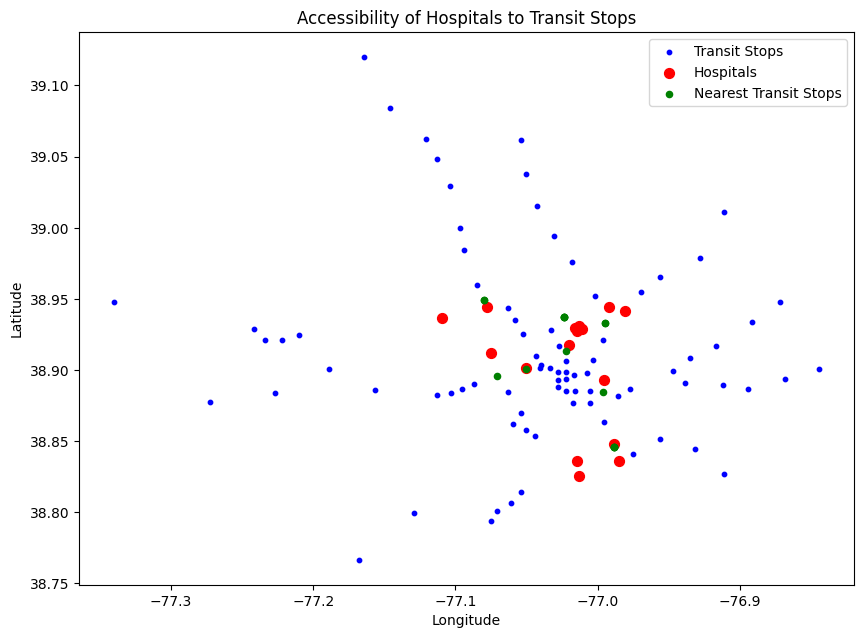

In [ ]:
import geopandas as gpd
from shapely.ops import nearest_points
from shapely.geometry import Point

# Load shapefiles
transit_stops_gdf = gpd.read_file('Metro_Rail_Stations_2018/Metro__Rail_Stations.shp')
hospitals_gdf = gpd.read_file('exercise07_alam/Hospitals_DC.shp')

# Function to find nearest transit stop to each hospital
def find_nearest_stop(hospital_geom, transit_stops_gdf):
    nearest = nearest_points(hospital_geom, transit_stops_gdf.unary_union)
    return nearest[1]

# Find nearest transit stop for each hospital
nearest_stops = []
for idx, hospital in hospitals_gdf.iterrows():
    nearest_stop_geom = find_nearest_stop(hospital.geometry, transit_stops_gdf)
    nearest_stops.append(nearest_stop_geom)

nearest_stops_gdf = gpd.GeoDataFrame(geometry=nearest_stops)

# Visualize the results
import matplotlib.pyplot as plt

# Plot hospitals and transit stops
fig, ax = plt.subplots(figsize=(10, 8))
transit_stops_gdf.plot(ax=ax, color='blue', markersize=10, label='Transit Stops')
hospitals_gdf.plot(ax=ax, color='red', markersize=50, label='Hospitals')

# Plot nearest stops for each hospital
nearest_stops_gdf.plot(ax=ax, color='green', markersize=20, label='Nearest Transit Stops')

plt.title('Accessibility of Hospitals to Transit Stops')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()
